# Abaout Dataset

Dataset didapankan dengan cara scrapping twitter menggunakan tweepy yang sebelumnya telah mendapatkan akses API twitter. keyword yang digunakan adalah Telkomsel dan Indosat dimana kedua provider tersebut merupakan provider terbesar dan karena untuk keyword dengan menggunakan provider lain tidak mendapatkan data yang baik maupun cukup sehingga diputuskan hanya 2 provider saja.
Tujuan dari analisis ini adalah untuk melakukan penelitian tentang sentimen analisis terhadap kedua provider dimana sentimennya adalah positive, negative dan neutral.

#Loading Dataset

In [104]:
 # import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [105]:
# loading data set yang digunakan telkomsel dan indosat
telkom = pd.read_excel('/content/telkom_tweet2.xlsx')
indosat = pd.read_excel('/content/indosat_tweet2.xlsx')

In [106]:
# menggabungkan kedua dataset menjadi satu
data = pd.concat([telkom,indosat], axis=0).reset_index(drop=True)

In [107]:
# menampilkan tampilan teratas 2 baris
data.head(2)

,tanggal,id,text,rt,fav,city,provider
0,2021-09-09 23:55:24,1436116057614283008,"@frauJae ini, ada yang cuma beberapa MB\n📌 Kuo...",0.0,0.0,NaN,Telkomsel
1,2021-09-09 23:55:17,1436116026601598976,RT @bertanyarl: Guys serius kalo main game pak...,54.0,0.0,NaN,Telkomsel


In [110]:
data.tail(2)

,tanggal,id,text,rt,fav,city,provider
14001,2021-09-06 06:23:44,1434764235297358080,@kegblgnunfaedh Nitip ya kak kuota indosat mur...,0.0,0.0,NaN,Indosat
14002,2021-09-06 06:23:39,1434764211033240064,@Caaaccaa si nyakitin,0.0,0.0,NaN,Indosat


In [108]:
# melihat informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   14003 non-null  object 
 1   id        14003 non-null  int64  
 2   text      14000 non-null  object 
 3   rt        13997 non-null  float64
 4   fav       13997 non-null  float64
 5   city      104 non-null    object 
 6   provider  14003 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 765.9+ KB


In [114]:
# melihat informasi berddasarkan provider Telkomsel
data[data.provider == "Telkomsel"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7003 entries, 0 to 7002
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   7003 non-null   object 
 1   id        7003 non-null   int64  
 2   text      7000 non-null   object 
 3   rt        6997 non-null   float64
 4   fav       6997 non-null   float64
 5   city      79 non-null     object 
 6   provider  7003 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 437.7+ KB


In [115]:
# melihat informasi berddasarkan provider Indosat
data[data.provider == "Indosat"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 7003 to 14002
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   7000 non-null   object 
 1   id        7000 non-null   int64  
 2   text      7000 non-null   object 
 3   rt        7000 non-null   float64
 4   fav       7000 non-null   float64
 5   city      25 non-null     object 
 6   provider  7000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 437.5+ KB


In [109]:
# menampilkan bila terdapt null value
data.isnull().sum()

tanggal         0
id              0
text            3
rt              6
fav             6
city        13899
provider        0
dtype: int64

In [116]:
# menampilkan deskripsi sederhana dataset
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tanggal,14003,13760,2021-09-07 05:20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,14003,NaN,NaN,NaN,1.43519e+18,2.10124e+16,0,1.4352e+18,1.43551e+18,1.43579e+18,1.43612e+18
text,14000,12977,"RT @skzstaysfam: Halo guys, disini gue mau dro...",69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rt,13997,NaN,NaN,NaN,1.10895,9.48775,0,0,0,0,412
fav,13997,NaN,NaN,NaN,0.214189,4.23139,0,0,0,0,420
city,104,75,Candipuro,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
provider,14003,2,Telkomsel,7003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dataset menunjukan:
1. terdapat null value yang terletak di beberapa kolom dan kolom city memiliki null value amat banyak, dimana dapat dikatakan bahwa hanya terdapat beberapa tempat yang tercatat.
2. baris Provider Telkomsel terdiri dari 7003 dan provider Indosat terdiri dari 7000, sehingga setelah digabung jumlah dataset adalah 14.003 baris.
3. id menunjukan id pengguna, pada kolom rt minimal rt adalah 0 dan maksimal adalah 412, sedangkan untuk fav minimal 0 dan maksimal adalah 420.
4. city yang menunjukan frequensi terbanyak adalah candipuro dengan 5 kali frekuensi kemunculan.

In [18]:
# inslatalasi library sastrawi
!pip install Sastrawi

     |████████████████████████████████| 209 kB 12.7 MB/s 


In [19]:
# import keperluan untuk cleaning
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
# copy data sebelum melakukan cleaning
df=data.copy()

In [21]:
# menampilkan banyaknya duplikat dan adanya duplikat
print(df.text.duplicated().sum())

df[df.text.duplicated() == True].head(3)

1025


,tanggal,id,text,rt,fav,city,provider
17,2021-09-09 23:43:43,1436113115851091968,RT @bertanyarl: Guys serius kalo main game pak...,54.0,0.0,NaN,Telkomsel
136,2021-09-09 20:36:20,1436065959777751040,@Telkomsel min cek dm,0.0,0.0,NaN,Telkomsel
357,2021-09-09 15:17:46,1435985791172308992,@Telkomsel cek dm min,0.0,0.0,NaN,Telkomsel


In [22]:
# drop data yang bersifat duplikat 
df = df.drop_duplicates(subset='text', keep='first').reset_index()

In [23]:
import re
import string

# fungsi clean digunakan membersihkan simbol atau frasa yang tidak diperlukan
def cleanTweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'https?://\S+|www\.\S+', ' ', tweet) # remove http
    tweet = re.sub(r'@\w+', ' ',tweet)#remove #+ @+
    tweet = re.sub(r'#\w+', ' ', tweet)#remove #+ @+
    tweet = re.sub(r'rt', ' ', tweet)
    tweet = re.sub(r'\d+', ' ', tweet) # remove digits
    tweet = re.sub(r'<.*?>+', ' ', tweet) # remove html tags
    tweet = re.sub(r'\n', ' ', tweet) # remove enter to 1 space
    tweet = re.sub(r'\s+', ' ', tweet)# remove extra spaces
    tweet = re.sub(r'[^0-9A-Za-z \t]+', '', tweet) #remove emoticon
    tweet = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', tweet) #remove punctuation
    return tweet

In [24]:
# mengaplikasikan proses cleaning
df['text_new'] = df.text.astype(str).apply(cleanTweet)

In [25]:
# mengambil data untuk normalisasi kata
alay_dict = pd.read_csv('https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv', encoding='latin-1', header=None)

In [26]:
# replace value
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

In [27]:
# membuat fungsi normalisasi kata
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

In [28]:
#melakukan normalisasi kata yang digunakan supaya mendapat makna kata yang sebenernya
df['text_new'] =df['text_new'].apply(normalize_alay)

In [29]:
#Load data list kata bersentimen negatif
neg_file=pd.read_csv('https://github.com/riochr17/Analisis-Sentimen-ID/raw/master/data/negatif.txt',header=None,delimiter='\t').values
neg_file=list(neg_file.reshape(neg_file.shape[0],))

#Load data list kata bersentimen positif
pst_file=pd.read_csv('https://github.com/riochr17/Analisis-Sentimen-ID/raw/master/data/positif.txt',header=None,delimiter='\t').values
pst_file=list(pst_file.reshape(pst_file.shape[0],))

In [30]:
# pengaplikasian data negatif dan positif
post_words_count=df['text_new'].apply(lambda x: len([w for w in x.split(' ') if w in pst_file]))
neg_words_count=df['text_new'].apply(lambda x: len([w for w in x.split(' ') if w in neg_file]))

In [31]:
#Menghitung skor sentimen, selisih jml kata positif dan negatif
df['sentimentscore']=(post_words_count-neg_words_count)

In [44]:
# mendefinisakan skore dengan sentimen, melakukan definisi berdasarkan nilai polaritas yang didapat 
# def getAnalysis(score):
#   if score > 0: # jika lebih dari 0 maka positive
#     return 1
#   elif score == 0: # jika sama dengan 0 maka neutral
#     return 0
#   else : # jika bukan keduanya maka negative
#     return -1

#Memberi sign utk selisih <0 -1, >0 1, dan =0 0
df['sentiment']=df['sentimentscore'].apply(lambda x: 1 if x>0 else -1 if x<0 else 0)

In [45]:
# melihat banyaknya jumlah sentiment secara keseluruhan
df.sentiment.value_counts()

 1    6407
 0    4719
-1    1852
Name: sentiment, dtype: int64

In [46]:
# fungsi tokenizing dari nltk
def wordToken(text):
    return word_tokenize(text)

# melakukan aplikasi tokenizing kalimat
df['text_token'] =df['text_new'].apply(wordToken)

In [47]:
# fungsi stopword untuk menghilangkat kata yang sering muncul dan kurang bernilai
def stopWords(corpus):
    stopWords = []
    for review in corpus:
        stopWords.append(
            ' '.join([word for word in review.split() 
                      if word not in stopwords])
        )
    return stopWords 

# mengaplikasikan proses stopword
df['stopword'] = df['text_token'].apply(stopWords)

In [48]:
# stemming kata menjadi akar kata menggunakan sastrawi karena stemming digunakan pada bahasa indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    return stemmer.stem(text)

In [49]:
# mengaplikasinakn fungsi stemming
df['stemming'] = df['stopword'].astype(str).apply(stemming)

In [50]:
# df['stopword'] = df['stopword'].astype(str).apply(cleanTweet)
# df['stopword'] = df['stopword'].apply(wordToken)
df['stemming'] = df['stemming'].apply(wordToken)

In [51]:
df.head(2)

,index,tanggal,id,text,rt,fav,city,provider,text_new,sentimentscore,sentiment,text_token,stopword,stemming
0,0,2021-09-09 23:55:24,1436116057614283008,"@frauJae ini, ada yang cuma beberapa MB\n📌 Kuo...",0.0,0.0,NaN,Telkomsel,ini ada yang cuma beberapa mb kuota amp puls...,-1,-1,"[ini, ada, yang, cuma, beberapa, mb, kuota, am...","[, , , cuma, beberapa, mb, kuota, amp, pulsa, ...","[cuma, beberapa, mb, kuota, amp, pulsa, transf..."
1,1,2021-09-09 23:55:17,1436116026601598976,RT @bertanyarl: Guys serius kalo main game pak...,54.0,0.0,NaN,Telkomsel,guys serius kalau main game pakai telkomsel ...,0,0,"[guys, serius, kalau, main, game, pakai, telko...","[guys, serius, kalau, main, game, pakai, telko...","[guys, serius, kalau, main, game, pakai, telko..."


In [52]:
# hasil stemming dengan sastrawi di save kedalam csv data
df.to_csv("stem2.csv")

In [117]:
df.head(2)

,index,tanggal,id,text,rt,fav,city,provider,text_new,sentimentscore,sentiment,text_token,stopword,stemming
0,0,2021-09-09 23:55:24,1436116057614283008,"@frauJae ini, ada yang cuma beberapa MB\n📌 Kuo...",0.0,0.0,NaN,Telkomsel,ini ada yang cuma beberapa mb kuota amp puls...,-1,-1,"[ini, ada, yang, cuma, beberapa, mb, kuota, am...","[, , , cuma, beberapa, mb, kuota, amp, pulsa, ...","[cuma, beberapa, mb, kuota, amp, pulsa, transf..."
1,1,2021-09-09 23:55:17,1436116026601598976,RT @bertanyarl: Guys serius kalo main game pak...,54.0,0.0,NaN,Telkomsel,guys serius kalau main game pakai telkomsel ...,0,0,"[guys, serius, kalau, main, game, pakai, telko...","[guys, serius, kalau, main, game, pakai, telko...","[guys, serius, kalau, main, game, pakai, telko..."


Pada tahap preprocesing dilakukan sebagai berikut:
1. install library sastrawi dan import library yang dibutuhkan.
2. menghapus dupplikat berdasarkan tweet sehingga data tweet tidak ada pengulangan.
3. menghilangkan simbol, punctuation, dan sebagainya untuk mendapatkan kata yang sesuai.
4. melakukan normalisasi kata dimana kata yang dinormalisasi merupakan kata kata singkatan atau bahasa gaul.
5. mencari score dan sentiment menggunakan kamus yang tersedia berdasarkan positive dan negative.
6. melakukan stopword untuk menghilangkan kata yang tidak perlu karena frekuensi munculnya banyak seperti saya, aku, kamu dan sebagainya.
7. melakukan stemming dengan library sastrawi untuk mendapatkan akar kata dari kata yang ada sehingga memberikan efisiensi pada model.

###split data


In [55]:
# import library untuk melakukan pemodelan
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,GlobalMaxPool1D
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2

In [56]:
# copy data
tweet_model= df.copy()

In [57]:
# melihat ukuran vocabulary
vocabulary = set()

for tweet in tweet_model.stemming:
    for word in tweet:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)

In [58]:
# jumlah vocabulary
print("banyaknya vocab:",len(vocabulary))

banyaknya vocab: 7069


In [59]:
#  menampilkan vocabulary
print(vocabulary)

{'ksjsjjdjdjd', 'clear', 'reseller', 'peny', 'lambatjika', 'inetnya', 'curve', 'sagami', 'ngejam', 'kawal', 'kuruptor', 'mimpi', 'dibalesnya', 'jempol', 'eak', 'takluk', 'card', 'chek', 'use', 'mbok', 'sombong', 'cdma', 'mob', 'kilas', 'performance', 'level', 'sponsor', 'njimmmmmmm', 'kepakenya', 'ji', 'webnya', 'jungkal', 'hi', 'pupuk', 'dityo', 'dapt', 'designernya', 'kentang', 'sedekah', 'traffic', 'diturunin', 'sptna', 'dag', 'potong', 'dealnya', 'kronologi', 'sidang', 'fase', 'supermarket', 'disautin', 'busettt', 'manja', 'mentah', 'indosatt', 'romantis', 'kisar', 'forge', 'rafi', 'aktiftidak', 'suka', 'nyeri', 'misael', 'bnibcaline', 'belah', 'ruwet', 'nit', 'ilham', 'uangfavorit', 'mabuk', 'marauke', 'lena', 'tlonk', 'likuiditas', 'ngeload', 'ceria', 'sinyalnyaaaaaaa', 'sutetnya', 'ychill', 'ega', 'mi', 'pita', 'kalian', 'cmonn', 'mint', 'knpasiiii', 'dibenahin', 'tarif', 'expect', 'kaode', 'beterai', 'ingin', 'ventures', 'baju', 'regspasinik', 'njr', 'rayen', 'dapar', 'las', 'p

In [60]:
# menghitung maksimal jarak sequence
max_seq_length = 0
for tweet in tweet_model.stemming:
    if len(tweet) > max_seq_length:
        max_seq_length = len(tweet)

In [61]:
# menampilkan panjang kalimat
print("maximal sequence :", max_seq_length)

maximal sequence : 25


In [62]:
# # mengaplikasikan token berdasarkan panjang vocab
tokenizer = Tokenizer(num_words=vocab_length)
# tokenizer.fit_on_texts(tweet_model.tweet_token)

# # menyiapkan sequence pada object tweet
# sequences = tokenizer.texts_to_sequences(tweet_model.tweet_token)

# word_index = tokenizer.word_index

# # padding sequnce dengan maksimal jarak dan mengakhirkan 0 untuk dilihat terakhir dengan post
# model_inputs = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [63]:

# membuat fungsi tokenize padding dan sequence pada object
def pipeline(test):
    # vocab_length = len(vocabulary)
    # max_seq_length = len(tweet)
    tokenizer = Tokenizer(num_words=vocab_length)
    tokenizer.fit_on_texts(test)
    sequences = tokenizer.texts_to_sequences(test)
    result = pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    return result

In [64]:
# mengaplikasikan pipeline
transform = pipeline(tweet_model.stemming)

In [65]:
# hasil pipeline
print(transform.shape)
transform

(12978, 25)


array([[ 151,  368,  521, ...,    0,    0,    0],
       [ 567,  757,   56, ...,    0,    0,    0],
       [  28,    6, 1077, ...,    0,    0,    0],
       ...,
       [  15,    5,    3, ...,    0,    0,    0],
       [  15,    5,    3, ...,    0,    0,    0],
       [  50, 1099,    0, ...,    0,    0,    0]], dtype=int32)

In [66]:
# melakukan label encoder pada target string atau disini adlah target
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
label = le.fit_transform(tweet_model.sentiment)

In [67]:
# konversi ke kategorikal masing masing
from keras.utils.np_utils import to_categorical

label = to_categorical(label)
label[:2]

array([[1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [68]:
# train test split dengan X adalah transform dan y adalah label
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transform, label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=42)

In [69]:
# hasil split pada x train
print(X_train.shape)
X_train[:2]

(8074, 25)


array([[ 23,   3,   2,  32,  17,  21,   7,   1,   4,   1,   4,   1,   4,
         32,  17, 797,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 23,   3,   2,  32,  17,   8, 126,  12,   3,  70,  13,   7,  21,
          1,   4,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int32)

In [70]:
# hasil split pada x train
print(y_train.shape) # setelah diubah dimensi y menjadi 2
y_train[:3]

(8074, 3)


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

#Model and Training

In [71]:
# clear sesi modeling
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [72]:
# model keras sequental
model1 = keras.models.Sequential([
    keras.layers.Embedding(input_dim=vocab_length , output_dim=32,input_length=max_seq_length),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(25,activation="tanh"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')
])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
model1.summary()
# keras.utils.plot_model(model1, "tweet.png", show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            226208    
_________________________________________________________________
dropout (Dropout)            (None, 25, 32)            0         
_________________________________________________________________
dense (Dense)                (None, 25, 20)            660       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 20)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 25)                4600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

In [73]:
# model compile
model1.compile(loss='categorical_crossentropy', 
               optimizer='adamax', 
               metrics=['accuracy'])

In [74]:
# model fit
history1 = model1.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/10
808/808 [==============================] - 11s 10ms/step - loss: 0.8774 - accuracy: 0.5848 - val_loss: 0.7106 - val_accuracy: 0.6850
Epoch 2/10
808/808 [==============================] - 8s 10ms/step - loss: 0.7093 - accuracy: 0.6891 - val_loss: 0.6379 - val_accuracy: 0.7249
Epoch 3/10
808/808 [==============================] - 8s 10ms/step - loss: 0.6543 - accuracy: 0.7166 - val_loss: 0.5969 - val_accuracy: 0.7396
Epoch 4/10
808/808 [==============================] - 8s 10ms/step - loss: 0.6020 - accuracy: 0.7336 - val_loss: 0.5456 - val_accuracy: 0.7760
Epoch 5/10
808/808 [==============================] - 9s 11ms/step - loss: 0.5586 - accuracy: 0.7655 - val_loss: 0.5175 - val_accuracy: 0.7946
Epoch 6/10
808/808 [==============================] - 9s 11ms/step - loss: 0.5175 - accuracy: 0.7862 - val_loss: 0.4801 - val_accuracy: 0.8072
Epoch 7/10
808/808 [==============================] - 9s 11ms/step - loss: 0.4840 - accuracy: 0.8106 - val_loss: 0.5272 - val_accuracy: 0.769

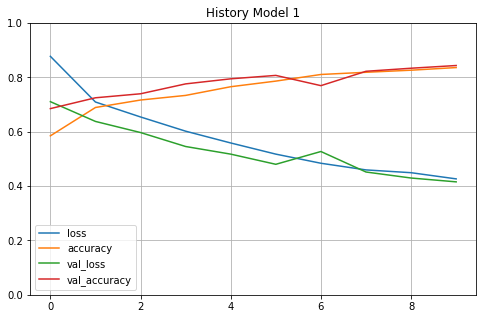

In [75]:
# menampilkan history model sequential
hist1=pd.DataFrame(history1.history)
hist1.plot(figsize=(8, 5))
plt.title("History Model 1")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

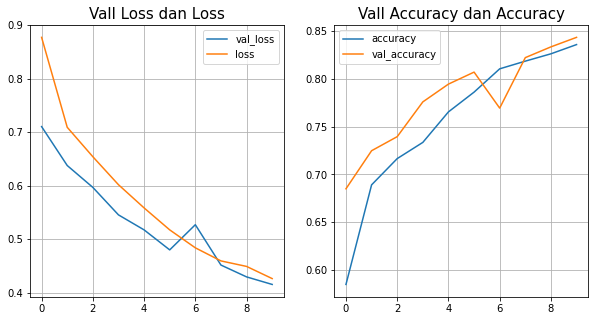

In [76]:
# menampilkan figure validasi dan real result
plt.subplot(121)
plt.gca()
plt.title('Vall Loss dan Loss', fontsize=15)
hist1['val_loss'].plot(figsize=(10, 5))
hist1['loss'].plot(figsize=(10, 5))
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.gca()
plt.title('Vall Accuracy dan Accuracy', fontsize=15)
hist1['accuracy'].plot(figsize=(10, 5))
hist1['val_accuracy'].plot(figsize=(10, 5))
plt.legend()
plt.grid(True)

In [77]:
# model evaluasi
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

253/253 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8778
[0.34608548879623413, 0.8777557611465454]
82/82 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8355
[0.41419661045074463, 0.8355161547660828]


In [78]:
# model prediction
pred = model1.predict(X_test)
y_test_1 = []
y_pred_1 = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1.append(one_hot_index)

for i in range(0, len(pred)):
    probs = pred[i]
    predicted_index = np.argmax(probs)
    y_pred_1.append(predicted_index)


# pred2 = model_Grid.predict(X_test)

# y_test_2 = []
# y_pred_2 = []

# for i in range(len(y_test)):
#     probs = y_test[i]
#     index_arr = np.nonzero(probs)
#     one_hot_index = index_arr[0].item(0)
#     y_test_2.append(one_hot_index)

# for i in range(0, len(pred2)):
#     probs = pred2[i]
#     predicted_index = np.argmax(probs)
#     y_pred_2.append(predicted_index)

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       375
           1       0.74      0.85      0.79       909
           2       0.93      0.87      0.90      1312

    accuracy                           0.84      2596
   macro avg       0.82      0.80      0.81      2596
weighted avg       0.84      0.84      0.84      2596



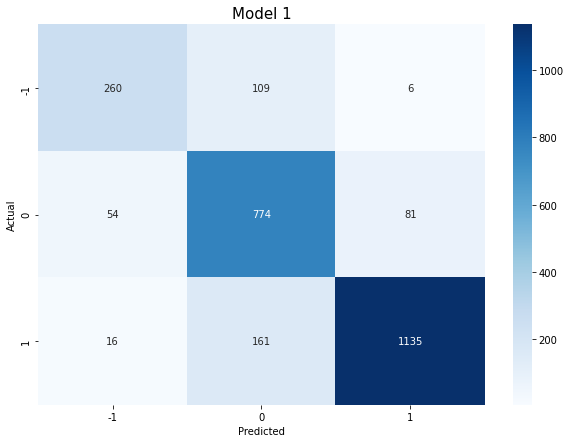

In [79]:
# menampilkan classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = tf.math.confusion_matrix(labels=y_test_1,predictions=y_pred_1)
labels = le.classes_

print(classification_report(y_test_1,y_pred_1))
plt.figure(figsize =(10,7))
plt.title('Model 1', fontsize=15)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")

print('='*50)
# cm = tf.math.confusion_matrix(labels=y_test_2,predictions=y_pred_2)
# labels = le.classes_

# print(classification_report(y_test_2,y_pred_2, target_names = labels))
# plt.figure(figsize =(10,7))
# plt.title('Model Grid', fontsize=15)
# sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")

In [80]:
# predict menggunakan model
y_pred = model1.predict(X_test)
y_pred

array([[0.5762619 , 0.32825276, 0.09548533],
       [0.01069256, 0.10343882, 0.8858686 ],
       [0.868112  , 0.11697347, 0.01491455],
       ...,
       [0.22379516, 0.72777426, 0.04843051],
       [0.09503119, 0.862945  , 0.04202383],
       [0.05202263, 0.86871165, 0.07926579]], dtype=float32)

In [129]:
# menampilkan label y_test
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

In [131]:
# menormalkan label ke semula
y_classes = le.inverse_transform(y_classes)

In [132]:
# label y_classes
y_classes

array([ 0,  1, -1, ...,  0,  0, -1])

In [135]:
# predict x_test
y_pred_classes = np.argmax(model1.predict(X_test), axis=-1)
y_pred_classes

array([0, 2, 0, ..., 1, 1, 1])

In [137]:
# menormalkan label ke semula
y_pred_classes = le.inverse_transform(y_pred_classes)

In [138]:
# menampilkan hasil prediksi
y_pred_classes

array([-1,  1, -1, ...,  0,  0,  0])

In [141]:
# membuat dataframe dari hasil predict
test_predict_label = pd.DataFrame(y_classes)
test_predict_label.columns = ['sentiment']

In [139]:
# membuat dataframe dari actual
test_actual_label = pd.DataFrame(y_pred_classes)
test_actual_label.columns = ['sentiment_predict']

In [145]:
# menggabungkan 2 dataframe menjadi 1
test_result = pd.concat([ test_predict_label,test_actual_label], axis=1)
test_result.head()

,sentiment,sentiment_predict
0,0,-1
1,1,1
2,-1,-1
3,-1,-1
4,1,1


#Analisis

In [81]:
test=df.copy()

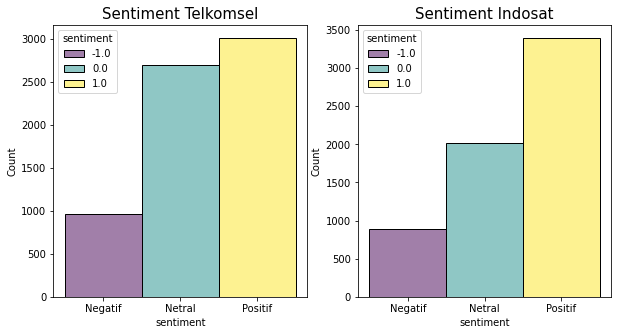

In [82]:
# menampilkan histogram untuk sentiment dari telkomsel dan indosat
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Sentiment Telkomsel", fontsize=15)
sns.histplot(x=test['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'}),hue='sentiment', palette="viridis", data=test[test['provider']=="Telkomsel"])

plt.subplot(122)
plt.title("Sentiment Indosat", fontsize=15)
sns.histplot(x=test['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'}),hue='sentiment', palette="viridis", data=test[test['provider']=="Indosat"])
plt.show()

In [83]:
# jumlah unique value pada sentiment dari telkomsel dan indosat
print(test['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'})[test['provider']=="Telkomsel"].value_counts())
test['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'})[test['provider']=="Indosat"].value_counts()

Positif    3011
Netral     2697
Negatif     967
Name: sentiment, dtype: int64


Positif    3396
Netral     2022
Negatif     885
Name: sentiment, dtype: int64

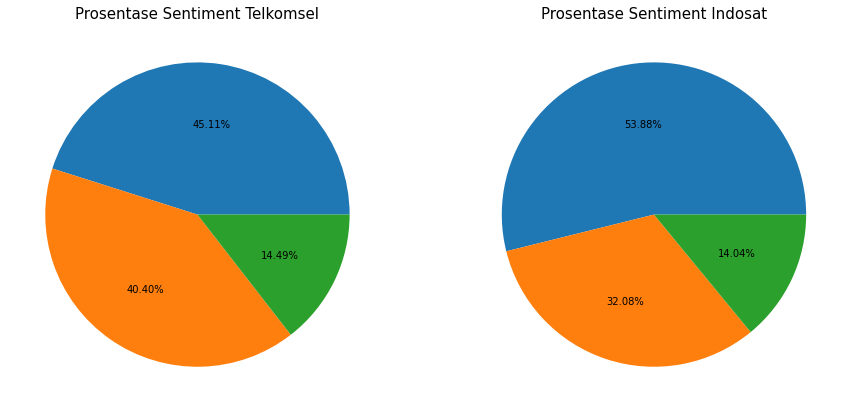

In [84]:
# menampilkan pie chart
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title("Prosentase Sentiment Telkomsel", fontsize=15)
plt.pie(test['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'})[test['provider']=="Telkomsel"].value_counts().sort_values(ascending=False),
        autopct="%.2f%%" )

plt.subplot(122)
plt.title("Prosentase Sentiment Indosat", fontsize=15)
plt.pie(test['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'})[test['provider']=="Indosat"].value_counts().sort_values(ascending=False),
        autopct="%.2f%%" )
plt.show()

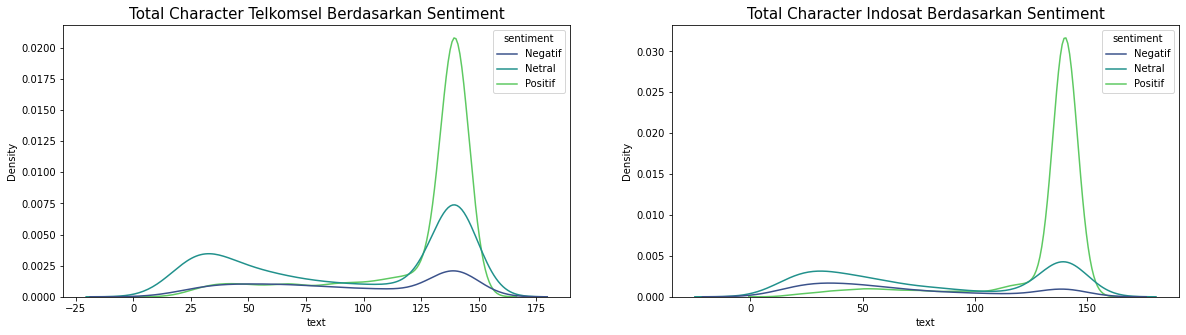

In [85]:
# menampilkan banyaknya karakter sentiment dari telkomsel dan indosat
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title("Total Character Telkomsel Berdasarkan Sentiment", fontsize=15)
sns.kdeplot(data=test[test['provider']=="Telkomsel"], x=test['text'][test['provider']=="Telkomsel"].str.len(),hue=test['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'})
, palette="viridis" )

plt.subplot(122)
plt.title("Total Character Indosat Berdasarkan Sentiment", fontsize=15)
sns.kdeplot(data=test[test['provider']=="Indosat"], x=test['text'][test['provider']=="Indosat"].str.len(),hue=test['sentiment'].replace({-1:'Negatif',0:'Netral',1:'Positif'})
, palette="viridis" )
plt.show()



###WordCloud

In [86]:
# membuat wordcloud, disini kita dapat menampilkan banyaknya word atau kata yang sering muncul pada sebuah kalimat
from wordcloud import WordCloud

# wordcloud keseluruhan sentiment
wordcloud = WordCloud(collocations = False,
                      background_color='white',
                      max_words=200,
                      max_font_size=60,
                      random_state=42
                      ).generate(str(test['stemming']))

# wordcloud sentimen positive
twt_post=test[test['sentiment']== 1]
wordcloud_pos = WordCloud(collocations = False,
                          background_color='white',
                          max_words=200,
                          max_font_size=60,
                          random_state=42
                          ).generate(str(twt_post['stemming']))

# wordcloud sentimen negative
twt_neg= test[test['sentiment']== -1]
wordcloud_neg = WordCloud(collocations = False,
                          background_color='black',
                          max_words=200,
                          max_font_size=60,
                          random_state=42
                          ).generate(str(twt_neg['stemming']))

# wordcloud sentimen neutral                      
twt_neu = test[test['sentiment']== 0]
wordcloud_neu = WordCloud(collocations = False,
                      background_color='grey',
                      max_words=200,
                      max_font_size=60,
                      random_state=42
                      ).generate(str(twt_neu['stemming']))


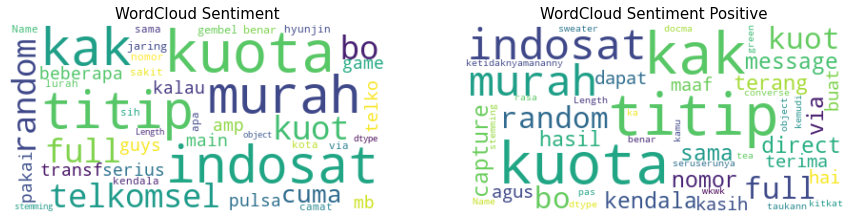

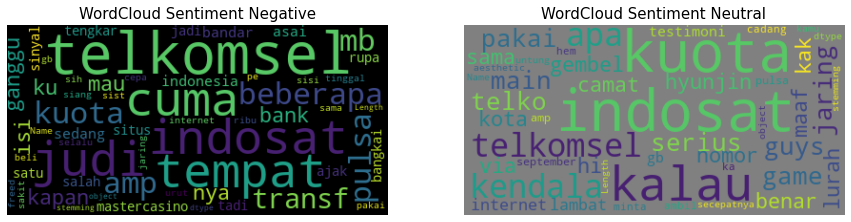

In [87]:
# plot wordcloud untuk semua sentimen yang ada

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title("WordCloud Sentiment", fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# plot wordcloud untuk sentimen positive
plt.subplot(122)
plt.title("WordCloud Sentiment Positive", fontsize=15)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

# plot wordcloud untuk sentimen negative
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title("WordCloud Sentiment Negative", fontsize=15)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")

# plot wordcloud untuk sentimen neutral
plt.subplot(222)
plt.title("WordCloud Sentiment Neutral", fontsize=15)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
from nltk.probability import FreqDist

# menghitung jumlah kata yang sering muncul pada tweet
test['word_count'] = test['stemming'].apply(lambda x : nltk.FreqDist(x))

In [91]:
jumlah = test['word_count'].values.sum()

In [92]:
# membuat dataframe untuk di sort 20 terbanyak
jumlah_baru = pd.DataFrame({'word':jumlah})
jumlah_baru.sort_values('word', ascending=False)[:9]

,word
gb,9387
indosat,6184
kuota,5282
k,5073
kak,3379
telkomsel,2441
bonus,2271
murah,1984
kakak,1319


In [93]:
# melakukan konversi dari objek ke time
test['tanggal'] = pd.to_datetime(test['tanggal'],format='%Y-%m-%d %H:%M', errors='coerce')

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


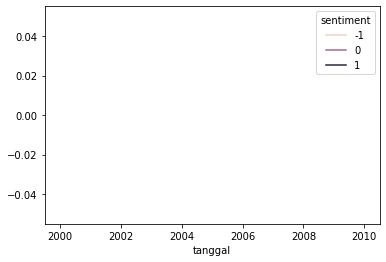

In [148]:
sns.lineplot(data=test, x="tanggal", hue='sentiment')